In [19]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt 
%matplotlib inline  

In [20]:

result = pd.read_csv('result_grid.csv')

In [21]:
result[['city','country']] =result['place'].str.split(',',expand=True)
result["city"]= result["city"].replace('Copenhagen Municipality', "Copenhagen") 
result

,place,average_index,max_index,min_index,std_index,grids,nsegments,unused_grids,city,country
0,"Utrecht,Netherlands",71.310832,100.000000,34.813665,9.514286,6.0,54343.0,0.0,Utrecht,Netherlands
1,"Antwerp,Belgium",68.785468,97.558661,31.406389,9.996498,17.0,82312.0,5.0,Antwerp,Belgium
2,"Copenhagen Municipality,Denmark",66.797955,97.558661,30.314010,10.795010,8.0,110419.0,1.0,Copenhagen,Denmark
3,"Amsterdam,Netherlands",68.909770,95.117322,37.329193,9.029751,17.0,106242.0,5.0,Amsterdam,Netherlands
4,"Malmo,Sweden",67.412702,90.234645,34.730849,8.797126,7.0,61445.0,2.0,Malmo,Sweden
5,"Bern,Switzerland",63.408062,92.675983,34.730849,11.744582,5.0,26550.0,1.0,Bern,Switzerland
6,"Bremen,Germany",64.916251,96.606855,31.366460,11.524786,26.0,162436.0,5.0,Bremen,Germany
7,"Hannover,Germany",66.442411,93.213711,24.689441,11.154898,13.0,113263.0,0.0,Hannover,Germany
8,"Strasbourg,France",66.165913,96.946170,31.017081,10.850788,7.0,48638.0,1.0,Strasbourg,France
9,"Bordeaux,France",66.183969,90.844979,35.405452,10.336919,3.0,24112.0,1.0,Bordeaux,France


In [22]:
coya =pd.read_csv('coya.csv')
coya

,Unnamed: 0,city,country,total_score,bike_infrastructure,bike_use_percent,road_quality
0,0,Utrecht,Netherlands,77.84,57.51,51.0,60.78
1,1,Munster,Germany,65.93,51.23,39.1,53.05
2,2,Antwerp,Belgium,60.51,34.28,28.9,53.37
3,3,Copenhagen,Denmark,60.46,55.23,29.0,61.60
4,4,Amsterdam,Netherlands,60.24,55.90,32.0,61.71
5,5,Malmo,Sweden,55.88,46.55,30.0,52.40
6,6,Hangzhou,China,52.55,32.72,30.0,35.06
7,7,Bern,Switzerland,48.76,65.10,15.0,65.46
8,8,Bremen,Germany,47.81,59.78,21.0,55.96
9,9,Hannover,Germany,46.70,53.68,19.0,51.51


In [23]:
df = result.merge(coya, on="city", how = 'inner')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.drop_duplicates(subset=None, inplace=True)
df

,place,average_index,max_index,min_index,std_index,grids,nsegments,unused_grids,city,country_x,country_y,total_score,bike_infrastructure,bike_use_percent,road_quality
0,"Utrecht,Netherlands",71.310832,100.000000,34.813665,9.514286,6.0,54343.0,0.0,Utrecht,Netherlands,Netherlands,77.84,57.51,51.0,60.78
1,"Antwerp,Belgium",68.785468,97.558661,31.406389,9.996498,17.0,82312.0,5.0,Antwerp,Belgium,Belgium,60.51,34.28,28.9,53.37
2,"Copenhagen Municipality,Denmark",66.797955,97.558661,30.314010,10.795010,8.0,110419.0,1.0,Copenhagen,Denmark,Denmark,60.46,55.23,29.0,61.60
3,"Amsterdam,Netherlands",68.909770,95.117322,37.329193,9.029751,17.0,106242.0,5.0,Amsterdam,Netherlands,Netherlands,60.24,55.90,32.0,61.71
4,"Malmo,Sweden",67.412702,90.234645,34.730849,8.797126,7.0,61445.0,2.0,Malmo,Sweden,Sweden,55.88,46.55,30.0,52.40
5,"Bern,Switzerland",63.408062,92.675983,34.730849,11.744582,5.0,26550.0,1.0,Bern,Switzerland,Switzerland,48.76,65.10,15.0,65.46
6,"Bremen,Germany",64.916251,96.606855,31.366460,11.524786,26.0,162436.0,5.0,Bremen,Germany,Germany,47.81,59.78,21.0,55.96
7,"Hannover,Germany",66.442411,93.213711,24.689441,11.154898,13.0,113263.0,0.0,Hannover,Germany,Germany,46.70,53.68,19.0,51.51
8,"Strasbourg,France",66.165913,96.946170,31.017081,10.850788,7.0,48638.0,1.0,Strasbourg,France,France,45.45,56.44,16.0,58.82
9,"Bordeaux,France",66.183969,90.844979,35.405452,10.336919,3.0,24112.0,1.0,Bordeaux,France,France,45.42,60.23,10.0,59.40


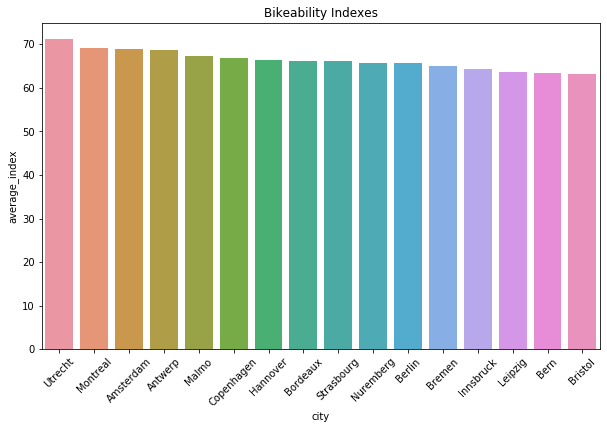

In [24]:
import seaborn as sns
plt.figure(figsize=(10,6))
# make barplot and sort bars
chart =sns.barplot(x='city', y="average_index", data=df, 
            order=df.sort_values('average_index', ascending= False).city)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title('Bikeability Indexes')
plt.show()


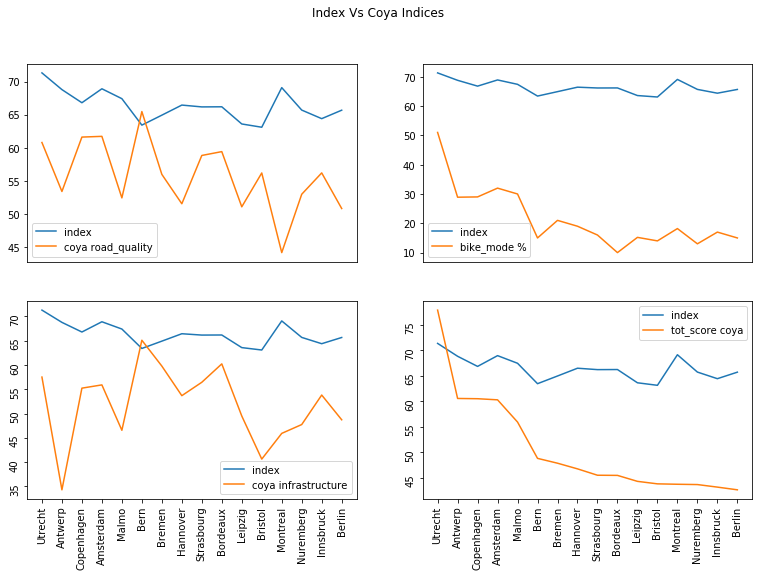

In [25]:
fig, ax = plt.subplots(2,2,figsize=(13,8))
fig.suptitle('Index Vs Coya Indices')
ax[0,0].plot(df['city'], df['average_index'], label = 'index')
ax[0,0].plot(df['city'], df['road_quality'], label = 'coya road_quality')
ax[1,0].plot(df['city'], df['average_index'], label = 'index')
ax[1,0].plot(df['city'], df['bike_infrastructure'], label = 'coya infrastructure')
ax[1,0].legend(loc = 'top right')
ax[0,0].legend(loc = 'top right')
ax[0,0].get_xaxis().set_ticks([])
ax[1,0].tick_params(labelrotation=90)

ax[1,1].plot(df['city'], df['average_index'], label = 'index')
ax[1,1].plot(df['city'], df['total_score'], label = 'tot_score coya')
ax[0,1].plot(df['city'], df['average_index'], label = 'index')
ax[0,1].plot(df['city'], df['bike_use_percent'], label = 'bike_mode %')
ax[1,1].tick_params(labelrotation=90)
ax[0,1].get_xaxis().set_ticks([])
ax[0,1].legend(loc = 'top right')
ax[1,1].legend(loc = 'top right')


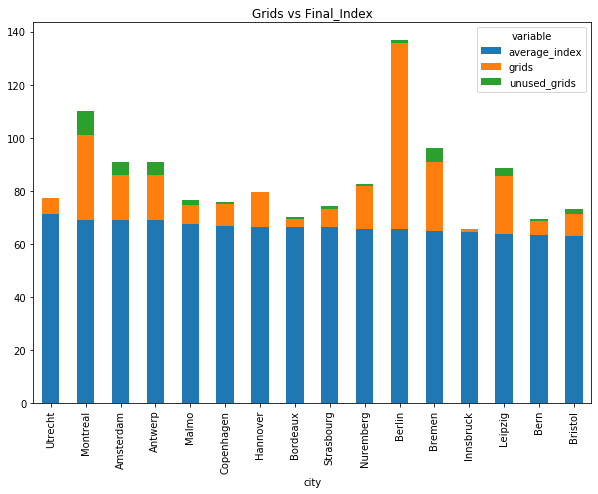

In [26]:
melted =pd.melt(df, id_vars = ['city'], value_vars= ['grids','unused_grids','average_index'])
pivot_df = melted.pivot(index='city', columns='variable', values='value')
#Note: .loc[:,['Jan','Feb', 'Mar']] is used here to rearrange the layer ordering
pivot_df.loc[:,['average_index','grids','unused_grids']].sort_values('average_index', ascending=False).plot.bar(stacked=True, figsize=(10,7),title ='Grids vs Final_Index')

In [33]:
whole_city =pd.read_csv('result_cities.csv')

In [34]:
whole_city.head()

,place,average_index,max_index,min_index,std_index
0,"Utrecht,Netherlands",66.861992,87.991718,31.863354,9.284332
1,"Antwerp,Belgium",63.773776,89.704969,28.881988,9.779387
2,"Copenhagen Municipality,Denmark",63.164807,90.104461,29.779080,10.330613
3,"Amsterdam,Netherlands",63.999999,89.704969,31.428571,9.123591
4,"Malmo,Sweden",63.842627,84.334023,34.821716,8.377377


In [35]:
whole_city[['city','country']] =whole_city['place'].str.split(',',expand=True)
whole_city["city"]= whole_city["city"].replace('Copenhagen Municipality', "Copenhagen") 
whole_city

,place,average_index,max_index,min_index,std_index,city,country
0,"Utrecht,Netherlands",66.861992,87.991718,31.863354,9.284332,Utrecht,Netherlands
1,"Antwerp,Belgium",63.773776,89.704969,28.881988,9.779387,Antwerp,Belgium
2,"Copenhagen Municipality,Denmark",63.164807,90.104461,29.779080,10.330613,Copenhagen,Denmark
3,"Amsterdam,Netherlands",63.999999,89.704969,31.428571,9.123591,Amsterdam,Netherlands
4,"Malmo,Sweden",63.842627,84.334023,34.821716,8.377377,Malmo,Sweden
5,"Bern,Switzerland",61.529403,87.279315,30.835686,11.574754,Bern,Switzerland
6,"Bremen,Germany",61.264716,87.991718,32.802795,11.087833,Bremen,Germany
7,"Hannover,Germany",61.031456,83.985507,24.820566,11.011841,Hannover,Germany
8,"Strasbourg,France",61.080319,86.199887,28.253106,10.080939,Strasbourg,France
9,"Bordeaux,France",63.392560,88.606366,35.245859,9.669710,Bordeaux,France


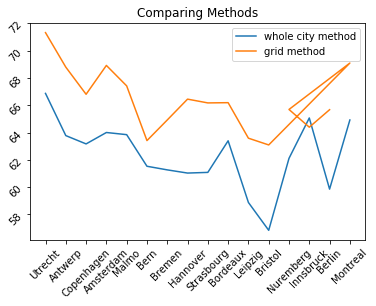

In [36]:
plt.plot(whole_city['city'], whole_city['average_index'], label = "whole city method")
plt.plot(df['city'],df['average_index'],label ='grid method')
plt.tick_params(labelrotation=45)
plt.title('Comparing Methods')

plt.legend()
plt.show()